In [1]:
from IPython.display import Image

## basics

- `@property` 注解的函数（返回的数据成员），其函数名不可以出现在 `__init__` 构造函数的赋值中？？
- `@classmethod` vs. `@staticmethod`

### 封装：member

- 类变量：未定义在 `__init__` 的类成员（member）


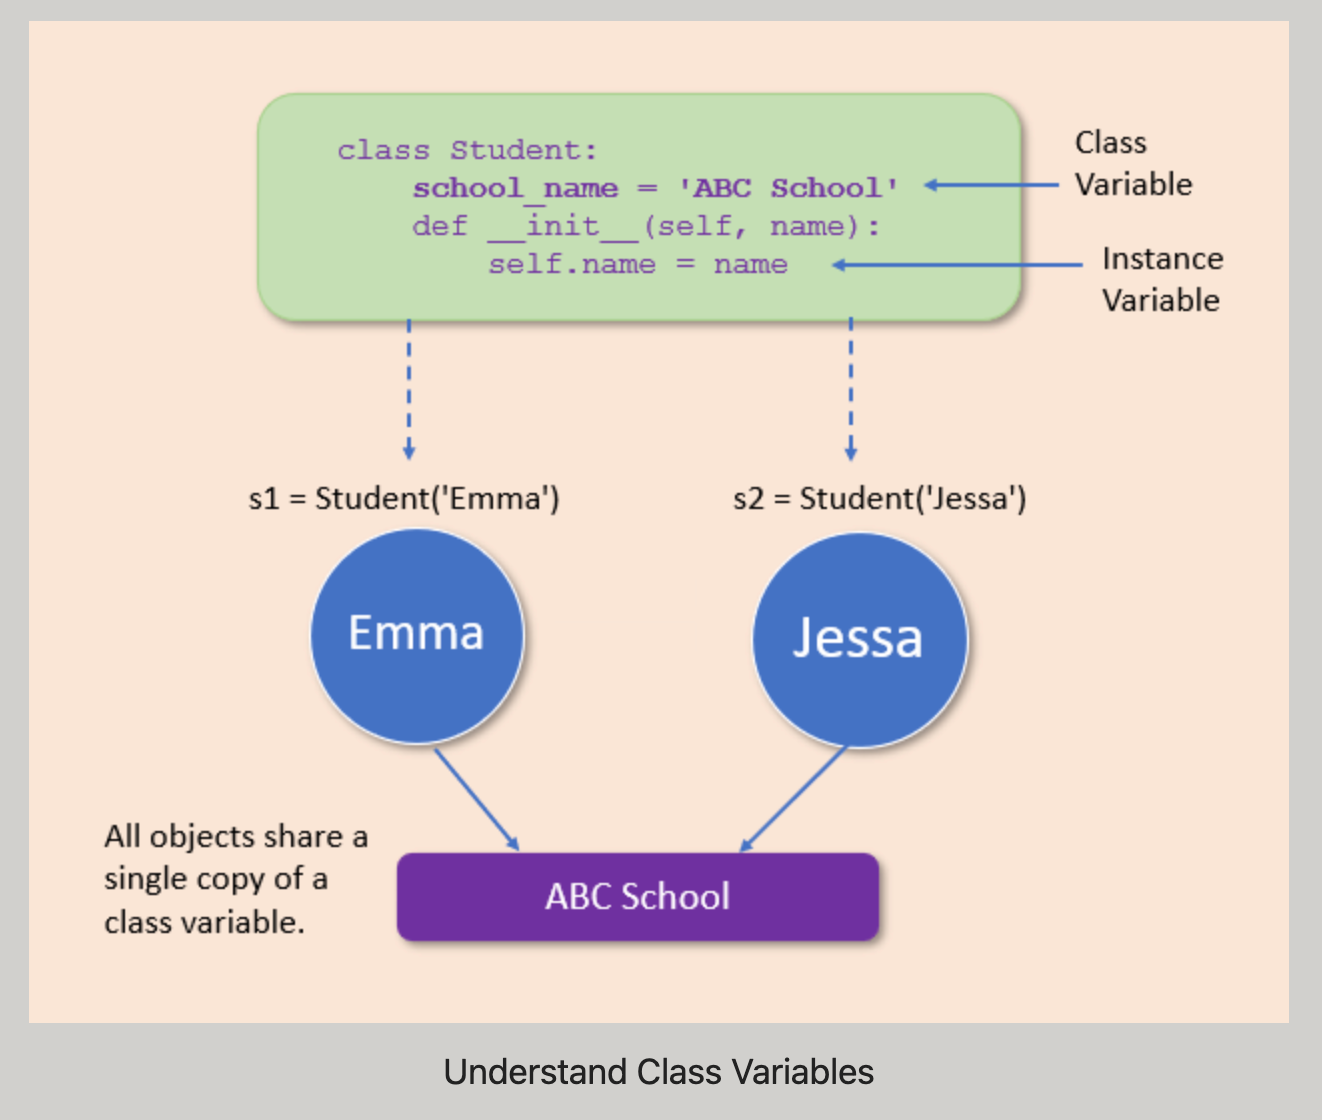

In [3]:
Image('../../imgs/class-variables.png', width=500)

In [4]:
class Student:
    school_name = 'ABC'
    def __init__(self, name):
        self.name = name

In [5]:
s1 = Student('Emma')
s2 = Student('Tom')

In [8]:
print(Student.school_name)
print(s1.school_name)
print(s2.school_name)

ABC
ABC
ABC


In [11]:
s1.school_name = 'ABCD'
print(s2.school_name)
print(Student.school_name)

ABC
ABC


In [14]:
# 修改类成员的正确方式
Student.school_name = 'ABCDE'
print(s1.school_name)
print(s2.school_name)

ABCD
ABCDE


## Enum

In [1]:
from enum import Enum

In [2]:
class StoryType (Enum):
    true_belief = "true_belief"
    false_belief = "false_belief"
    second_order_false_belief = "second_order_false_belief"

### `.value`

In [3]:
StoryType.false_belief.value

'false_belief'

## 类成员

In [13]:
class A:
    # 类粒度的
    var_1 = 'class variable of Class A'
    def __init__(self):
        # 虽然是同名的，但依然是对象粒度的
        # 如果构造函数中内有该成员变量，
        # a = A()
        # a.var_1 其实会指向类成员；
#         self.var_1 = "inside class A's __init__"
        pass
a = A()
a.var_1

'class variable of Class A'

In [12]:
class A:
    # 类粒度的
    var_1 = 'class variable of Class A'
    def __init__(self):
        # 虽然是同名的，但依然是对象粒度的
        # 如果构造函数中内有该成员变量，
        # a = A()
        # a.var_1 其实会指向类成员；
        self.var_1 = "inside class A's __init__"

In [5]:
A.var_1

'class variable of Class A'

In [6]:
a = A()
a.var_1

"inside class A's __init__"

### 继承情况下

In [7]:
class B(A):
    var_2 = 'class variable of Class B'

In [8]:
b = B()

In [11]:
print(b.var_1)
print(B.var_1)
print(b.var_2)

inside class A's __init__
class variable of Class A
class variable of Class B


### 完全同名的情况

In [14]:
class A:
    # 类粒度的
    var_1 = 'class variable of Class A'
    def __init__(self):
        self.var_1 = "inside class A's __init__"

class B(A):
    # 类粒度的
    var_1 = 'class variable of Class B'
    def __init__(self):
        self.var_1 = "inside class B's __init__"

b = B()
print(b.var_1)

inside class B's __init__


## super

- `super()`
    - 首先是一个方法，用来获取父类成员方法
    - 会返回一个父类的临时对象（temporary object）

In [17]:
class A:
    # 类粒度的
    var_1 = 'class variable of Class A'
    def __init__(self):
        self.var_1 = "inside class A's __init__"
        self.var_2 = 'hahh'

class B(A):
    # 类粒度的
    var_1 = 'class variable of Class B'
    def __init__(self):
        self.var_1 = "inside class B's __init__"

In [16]:
b = B()
print(b.var_2)

AttributeError: 'B' object has no attribute 'var_2'

In [28]:
class A:
    # 类粒度的
    var_1 = 'class variable of Class A'
    def __init__(self):
        self.var_1 = "inside class A's __init__"
        self.var_2 = 'hahh'

class B(A):
    # 类粒度的
    var_1 = 'class variable of Class B'
    def __init__(self):
#         super().__init__()
        super(B, self).__init__()
        self.var_1 = "inside class B's __init__"

In [30]:
b = B()
print(b.var_1)
print(b.var_2)

inside class B's __init__
hahh


### 注意 `super()` 在 `__init__` 中的位置

In [26]:
class A:
    # 类粒度的
    var_1 = 'class variable of Class A'
    def __init__(self):
        self.var_1 = "inside class A's __init__"
        self.var_2 = 'hahh'

class B(A):
    # 类粒度的
    var_1 = 'class variable of Class B'
    def __init__(self):
        self.var_1 = "inside class B's __init__"
        #         super().__init__()
        super(B, self).__init__()

In [27]:
b = B()
b.var_1

"inside class A's __init__"